In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pyleoclim import wavelet

In [7]:
import astropy

In [8]:
import numpy as np
from astropy.timeseries import LombScargle

In [11]:
f = 1/50
t = np.arange(2001)
y = np.cos(2*np.pi*f*t)

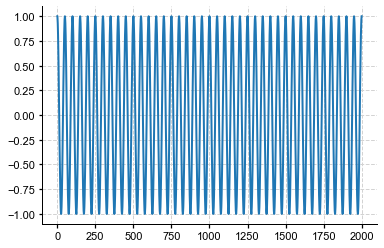

In [12]:
plt.plot(t,y)

In [16]:
frequency=wavelet.make_freq_vector(t)

In [26]:
frequency

array([0.001     , 0.00103156, 0.00106412, 0.0010977 , 0.00113235,
       0.00116808, 0.00120495, 0.00124298, 0.00128221, 0.00132268,
       0.00136442, 0.00140748, 0.0014519 , 0.00149773, 0.001545  ,
       0.00159376, 0.00164406, 0.00169595, 0.00174947, 0.00180469,
       0.00186165, 0.0019204 , 0.00198101, 0.00204353, 0.00210803,
       0.00217456, 0.00224319, 0.00231399, 0.00238702, 0.00246235,
       0.00254007, 0.00262024, 0.00270293, 0.00278824, 0.00287624,
       0.00296702, 0.00306066, 0.00315725, 0.0032569 , 0.00335969,
       0.00346572, 0.00357511, 0.00368794, 0.00380433, 0.0039244 ,
       0.00404826, 0.00417603, 0.00430782, 0.00444378, 0.00458403,
       0.00472871, 0.00487795, 0.0050319 , 0.00519071, 0.00535454,
       0.00552353, 0.00569786, 0.00587769, 0.00606319, 0.00625455,
       0.00645195, 0.00665558, 0.00686563, 0.00708232, 0.00730584,
       0.00753642, 0.00777428, 0.00801964, 0.00827275, 0.00853384,
       0.00880318, 0.00908101, 0.00936762, 0.00966327, 0.00996

In [35]:
%time
power = LombScargle(t, y).power(frequency,method='slow')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


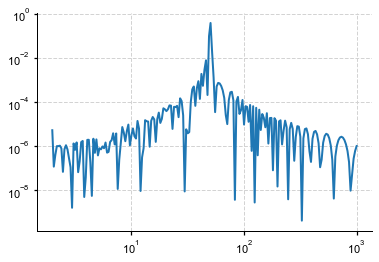

In [47]:
plt.loglog(1/frequency,power)

In [48]:
%time
power=LombScargle(t, y,fit_mean=False).power(frequency,method='scipy')

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 14.8 µs


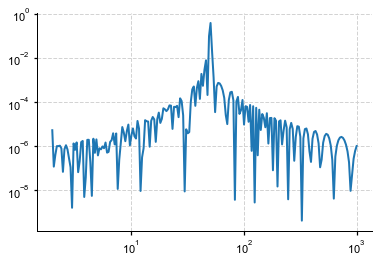

In [49]:
plt.loglog(1/frequency,power)

In [50]:
%time
power = LombScargle(t, y,fit_mean=False).power(frequency,method='cython')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs


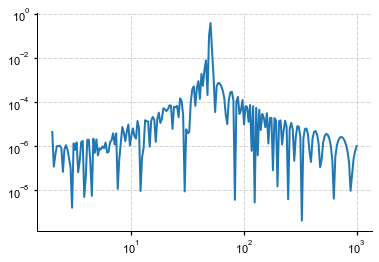

In [51]:
plt.loglog(1/frequency,power)

In [52]:
%time
power = LombScargle(t, y).power(frequency,method='chi2')

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs


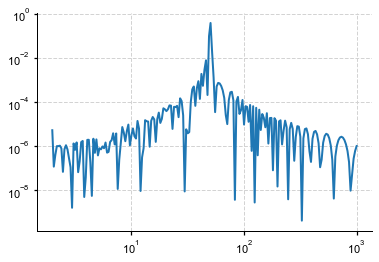

In [53]:
plt.loglog(1/frequency,power)